# ECE 445 (ML for ENGG): Mini Jupyter Exercise #4

*Eric Jiang
ewj12 158002948*

11/16/2018

In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

samples, labels = load_wine(return_X_y=True)

**Standardization of Data**

Problem 1

In [2]:
# Transpose the data matrix so each sample is a column
X = samples.T

mean_vec = (np.sum(X, axis=1))/(X.shape[1])
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

#center the matrix
centered_X = X - mean_mat

Problem 2

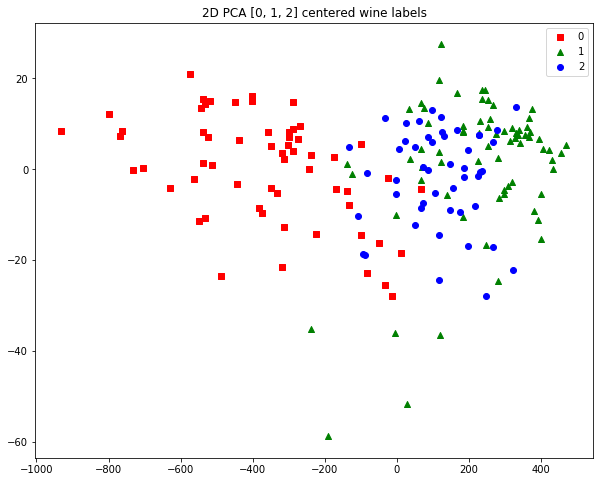

In [3]:
#Singular Value Decomp centered matrix
U, s, Vh = np.linalg.svd(centered_X)

#Top 2 principal components of the centered data matrix
U2 = U[:,0:2]

#PCA features
X_tilde = U2.T@centered_X

#Splitting the 0 and 1 2D (x,y) coordinates
x0vals = []
y0vals = []
x1vals = []
y1vals = []
x2vals = []
y2vals = []

for i in range (0,178):
    xn = X_tilde.T[i,0]
    yn = X_tilde.T[i,1]
    
    # if label = 0 append to x0,y0 else append to x1,y1
    if labels[i] == 0:
        x0vals.append(xn)
        y0vals.append(yn)
    elif labels[i] == 1:
        x1vals.append(xn)
        y1vals.append(yn)
    else:
        x2vals.append(xn)
        y2vals.append(yn)
        
#Plotting
plt.figure(figsize=(10,8))
plt.scatter(x0vals,y0vals, color = 'red', marker = 's', label = '0')
plt.scatter(x1vals,y1vals, color = 'green', marker = '^', label = '1')
plt.scatter(x2vals,y2vals, color = 'blue', marker = 'o', label = '2')
plt.title('2D PCA [0, 1, 2] centered wine labels')
plt.legend()
plt.show()

Problem 3

In [4]:
N = centered_X[0].size

# Normalization of the dataset (normalization of each column)
for idx in range(N):
    centered_X[:,idx:idx+1] = centered_X[:,idx:idx+1]/np.linalg.norm(centered_X[:,idx:idx+1])

# Set normal_X variable to the new centered_X
normal_X = centered_X

Problem 4

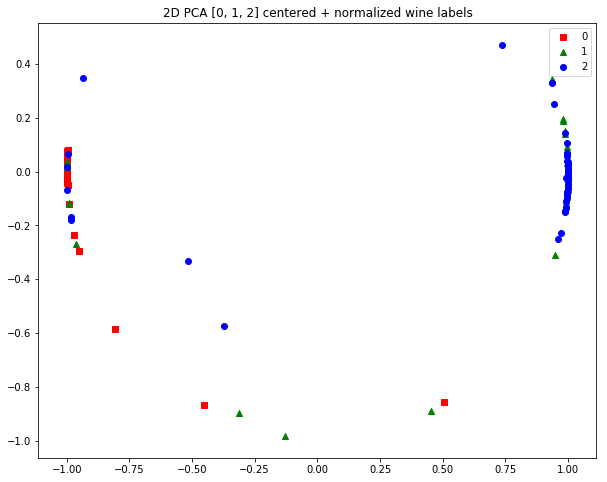

In [5]:
#Singular Value Decomp centered matrix
U, s, Vh = np.linalg.svd(normal_X)

#Top 2 principal components of the centered data matrix
U2 = U[:,0:2]

#PCA features
X_tilde1 = U2.T@normal_X

#Splitting the 0 and 1 2D (x,y) coordinates
x0vals = []
y0vals = []
x1vals = []
y1vals = []
x2vals = []
y2vals = []

for i in range (0,178):
    xn = X_tilde1.T[i,0]
    yn = X_tilde1.T[i,1]
    
    # if label = 0 append to x0,y0 else append to x1,y1
    if labels[i] == 0:
        x0vals.append(xn)
        y0vals.append(yn)
    elif labels[i] == 1:
        x1vals.append(xn)
        y1vals.append(yn)
    else:
        x2vals.append(xn)
        y2vals.append(yn)
        
#Plotting
plt.figure(figsize=(10,8))
plt.scatter(x0vals,y0vals, color = 'red', marker = 's', label = '0')
plt.scatter(x1vals,y1vals, color = 'green', marker = '^', label = '1')
plt.scatter(x2vals,y2vals, color = 'blue', marker = 'o', label = '2')
plt.title('2D PCA [0, 1, 2] centered + normalized wine labels')
plt.legend()
plt.show()

Problem 5

Based on the two plots, it is shown that the first 'only centered' data is better for PCA feature classification.

This is because although the 1st plot has overlapping, it still has some seperation. Whereas the second 'standardized' plot is too compact due to unit variance. In this case, since the blue label is overlapped amongst the red and green it is condensed onto both sides of the classifier. Thus, the blue label 2 is practically impossible to discern. Overlapping in the data seems to greatly hinder Normalized data due to the need for larger variance (not unit variance) to determine seperation of labels.

**Naive Bayes Classification**

Assume all entries in X conditioned on class are independent

Problem 1

In [ ]:
# Three Class Naive Bayes Classifier

Problem 2

In [43]:
#Import Library of Gaussian Naive Bayes model

N = 178
# given col = 10, k = 5 we want 5 folds of 2
# print(data[:,x:i]) retrieves cols from x:i
# we want :, 0:2  gets 0th, 1st
# 2:4 gets 2nd 3rd
# 4:6 gets 4th 5th ... 6 7, 8 9

# create k-fold cross validation algorithm to split data
def kfoldcross(data,k):
    
    #find the length per fold
    length = int(len(data[0])/k)
    folds = []

    # divide data into k# of folds *note remainder is left out
    for i in range(k):
        folds.append(data[:,i*length:i*length+length])

    # create matrices for training and testing data
    train_mat = []
    test_mat = []

    # loop through k times to find k different test data
    # along with corresponding training data
    for i in range(k):
        index = k-1-i #indexing through folds

        #append fold data onto train/test data
        train_data = folds[:index]+folds[(index+1):]
        test_data = folds[index]

        #append train/test data onto matrices, mat[i] to call the data
        train_mat.append(train_data)
        test_mat.append(test_data)
        
    #Convert appended lists into np arrays
    train_mat = np.asarray(train_mat)
    test_mat = np.asarray(test_mat)
    
    #outputs the training matrix and testing matrix
    return train_mat, test_mat


In [42]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

# Adds
stackmat = []
for i in range (0,N):
    n = np.hstack((X_tilde1[:,i],labels[i]))
    stackmat.append(n)

stackmatarray = np.asarray(stackmat)
stackmat = stackmatarray.T

trmat3, temat3 = kfoldcross(X_tilde1,5)

#trmat3[0] 4 folds of 2 x 35
#temat3[0] 1 fold of 2 x 35
print(temat3[0].shape)

model = GaussianNB()
model.fit(X_tilde1.T, labels)

expected = labels
predicted = model.predict(X_tilde1.T)

average = metrics.f1_score(expected, predicted, average='weighted', labels=np.unique(predicted))
print(average)



(2, 35)
0.8107879273504274


Problem 3

In [55]:
# mean function
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
def variance(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return variance

numbers = predicted
numtitle = 'SK Gaussian'
print('Summary of {0}:\n mean={1}, variance={2}'.format(numtitle, mean(numbers), variance(numbers)))

Summary of SK Gaussian:
 mean=0.6123595505617978, variance=0.23871643496476797
